In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import calendar

pd.set_option('display.max_columns', None) #mostrar todas as colunas
pd.set_option('display.max_rows', 50)  #mostrar no max 50 linhas
pd.set_option('display.max_colwidth', None)  #mostrar a grossura máxima das colunas

In [24]:
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

ValueError: could not convert string to float: '2022-08-01'

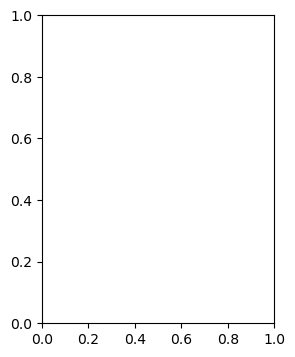

In [25]:
fig, ax = plt.subplots(figsize=(3,4))
cluster = hierarchy.dendrogram(hierarchy.complete(df2), ax=ax, color_threshold=5)
plt.show()

In [23]:
n_clusters = 2
km_2 = KMeans(n_clusters=n_clusters, n_init=20)
km_2.fit(df2)

ValueError: could not convert string to float: '2022-08-01'

In [2]:
df = pd.read_excel('teste2.xlsx')
df.to_csv('agorafoi.csv')
df2 = pd.read_csv('agorafoi.csv')
df2 = df2.drop(columns =['Unnamed: 0','Unnamed: 0.1'])

In [3]:
df2

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales
0,2022-08-01,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,976,2443,3665,0,3665,1
1,2022-08-01,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,976,2443,3665,0,3665,4
2,2022-08-01,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,1027,2463,3695,0,3695,2
3,2022-08-01,LGPKG-1139792,2778976,Aéreo de Belo Horizonte,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5498,880,2551,3827,0,3827,1
4,2022-08-01,LGPKG-1139792,2778976,Aéreo de Belo Horizonte,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5498,935,2573,3860,0,3860,2
5,2022-09-26,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",121.0,20.0,7299,0,0,7299,0,7299,1
6,2022-10-02,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",145.0,22.0,7299,0,0,7299,0,7299,1
7,2022-10-04,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",149.0,26.0,7299,0,0,7299,0,7299,1
8,2022-10-04,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",149.0,26.0,7299,0,0,7299,0,7299,1
9,2022-10-08,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",100.0,9.0,7299,1314,0,8613,0,8613,1


Time series for discount

In [47]:
def time_series_disc(df):
    plt.plot(df['datebr'],df['discount'])
    plt.ylabel('Discount in R$')
    plt.title(f'Time series discount')
    plt.plot()

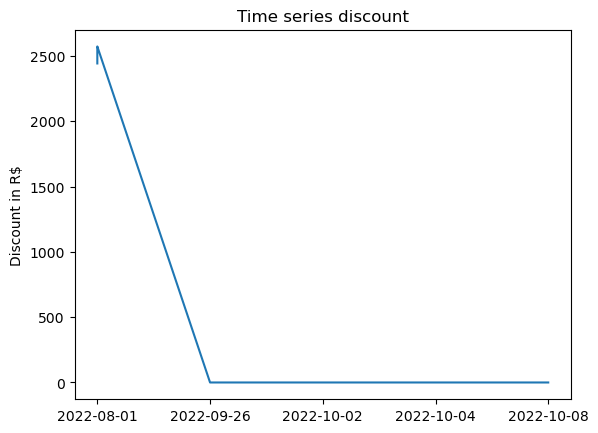

In [48]:
time_series_disc(df2)

Looking for extreme cases of sales.

In [61]:
hig_sale = []
hig_totalprice = []
for i in range(df2.shape[0]):
    if df2.iloc[i, 22] == df2['sales'].max():
        hig_sale.append(df2.iloc[i,5])

for i in range(df2.shape[0]):
    if df2.iloc[i, 21] == df2['totalprice'].max():
        hig_totalprice.append(df2.iloc[i,5])

In [125]:
ext_value(df2, 'sales')

['Pacote de Viagem - Lisboa + Porto - 2023']


In [126]:
ext_value(df2,'totalprice')

['Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023']


## >>> Function that calculates extreme values of a given column and  returns that package. Trying to answer extreme cases of sales or prices.

In [124]:
####
## Function that calculates extreme values of a given column and  returns that package.
## df = dataframe
## column = str
## Args:
## df: raw dataframe containing the data
## column: column whose extreme value is going to be calculated
def ext_value(df, column):
    hig_value = []
    for i in range(df.shape[0]):
        if df.iloc[i, df.columns.get_loc(column)] == df[column].max():
            hig_value.append(df.iloc[i,df.columns.get_loc('product_name')])
    print(hig_value)

## I'm trying to answer the following question: how sales behave with day week? Which day sales the most?

In [4]:
#Adiciona a coluna com o dia da semana
week_day = []
for i in range (10): 
    date = pd.Timestamp(df2.iloc[i,0])
    week_day.append(date.day_name())
df2['Week day'] = week_day

In [5]:
#Add a column with integer as a day week
week_day_int = []
for i in range (10): 
    date = pd.Timestamp(df2.iloc[i,0])
    week_day_int.append(date.weekday())
df2['Week day int'] = week_day_int

In [6]:
df2.head(3)

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales,Week day,Week day int
0,2022-08-01,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,976,2443,3665,0,3665,1,Monday,0
1,2022-08-01,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,976,2443,3665,0,3665,4,Monday,0
2,2022-08-01,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,1027,2463,3695,0,3695,2,Monday,0


In [7]:
df2['Week day'].value_counts()

Monday      6
Tuesday     2
Sunday      1
Saturday    1
Name: Week day, dtype: int64

In [10]:
#Add column with formatted_date dd-mm-yyyy
formatted_date = []
for i in range(10):
    original_date = dt.datetime.strptime(df2.iloc[i, 0], '%Y-%m-%d')
    formatted_date.append(original_date.strftime("%d-%m-%Y"))
df2['formatted_date'] = formatted_date
df2.head(7)

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales,Week day,Week day int,formatted_date
0,2022-08-01,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,976,2443,3665,0,3665,1,Monday,0,01-08-2022
1,2022-08-01,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,976,2443,3665,0,3665,4,Monday,0,01-08-2022
2,2022-08-01,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,1027,2463,3695,0,3695,2,Monday,0,01-08-2022
3,2022-08-01,LGPKG-1139792,2778976,Aéreo de Belo Horizonte,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5498,880,2551,3827,0,3827,1,Monday,0,01-08-2022
4,2022-08-01,LGPKG-1139792,2778976,Aéreo de Belo Horizonte,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5498,935,2573,3860,0,3860,2,Monday,0,01-08-2022
5,2022-09-26,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",121.0,20.0,7299,0,0,7299,0,7299,1,Monday,0,26-09-2022
6,2022-10-02,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",145.0,22.0,7299,0,0,7299,0,7299,1,Sunday,6,02-10-2022


The pie chart below show that Monday is the best day for sales:

<Axes: ylabel='sales'>

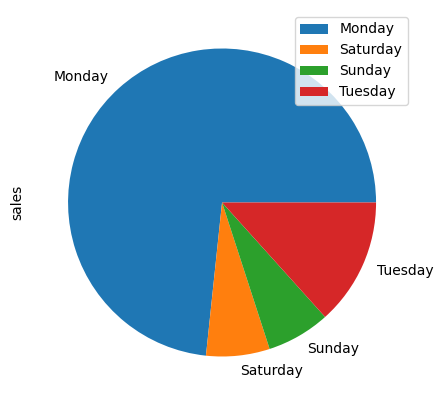

In [11]:
t = df2.groupby(['Week day']).sum(['sales'])
plot2 = t.plot.pie(y='sales', figsize=(5, 5))
plot2

The bar graph shows the same:

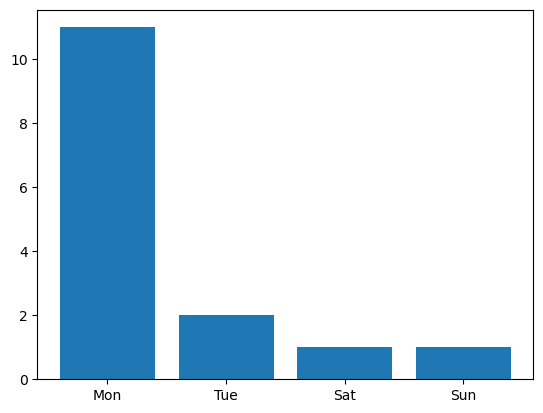

In [12]:
a = df2.groupby(['Week day int']).sum(['sales'])

list1 = []
for i in range(len(a.index)):
    list1.append(calendar.day_abbr[a.index[i]])

plt.bar(list1, a['sales'])
plt.show()

Same conclusion with a pie chart:

<Axes: ylabel='sales'>

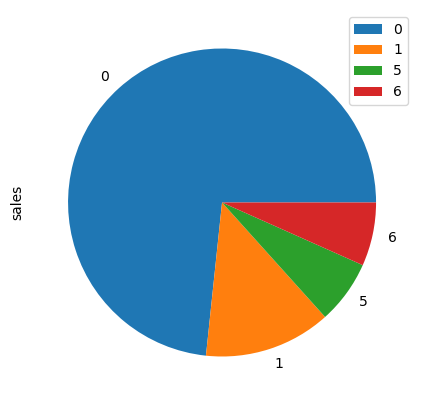

In [13]:
plot = a.plot.pie(y='sales', figsize=(5, 5))
plot

Plotting scatter plots of numer of occurences per day of a specific offer_option_id

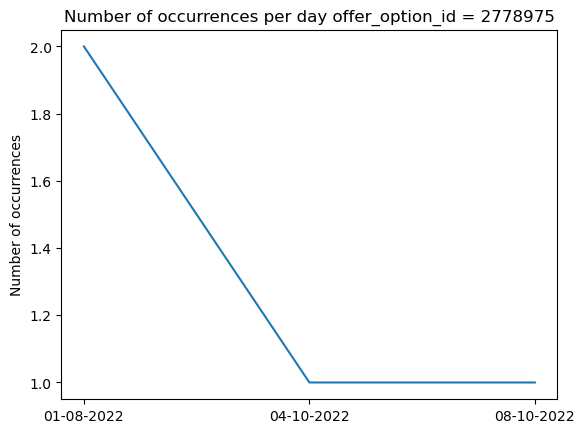

In [15]:
u = df2.loc[df2['offer_option_id'] == 2778975]['formatted_date'].value_counts()
u = dict(u)
plt.plot(u.keys(),u.values(), label = '2778975')
plt.title('Number of occurrences per day offer_option_id = 2778975')
plt.ylabel('Number of occurrences')
plt.show()

In [18]:
l = df2.loc[df2['offer_option_id'] == 2778975]['formatted_date']
l[]

0    01-08-2022
2    01-08-2022
7    04-10-2022
9    08-10-2022
Name: formatted_date, dtype: object

In [19]:
u

{'01-08-2022': 2, '04-10-2022': 1, '08-10-2022': 1}

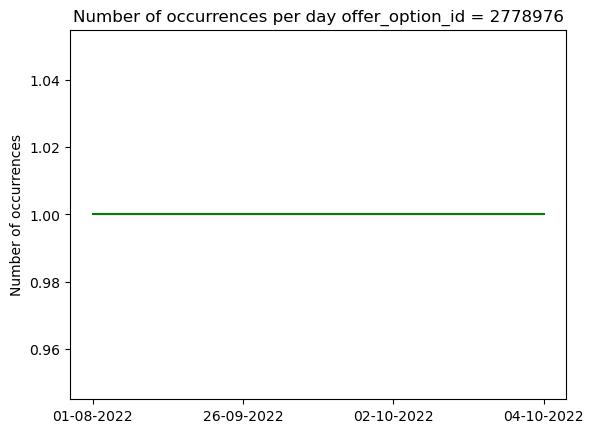

In [9]:
y = df2.loc[df2['offer_option_id'] == 2778974]['formatted_date'].value_counts()
y = dict(y)
plt.plot(y.keys(),y.values(), label = '2778974', color = 'g')
plt.title('Number of occurrences per day offer_option_id = 2778976')
plt.ylabel('Number of occurrences')
plt.show()

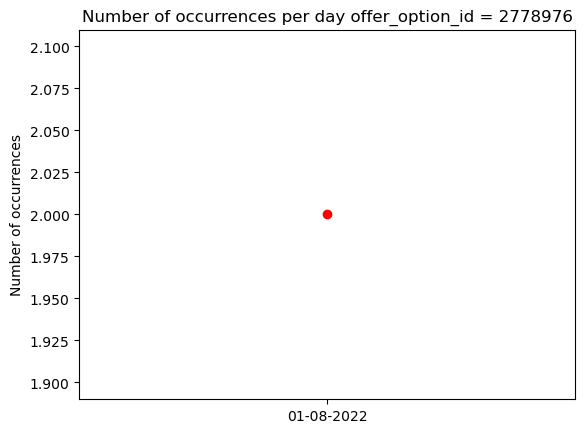

In [10]:
z = df2.loc[df2['offer_option_id'] == 2778976]['formatted_date'].value_counts()
z = dict(z)
plt.plot(z.keys(),z.values(), 'ro', label = '2778976')
plt.title('Number of occurrences per day offer_option_id = 2778976')
plt.ylabel('Number of occurrences')
plt.show()

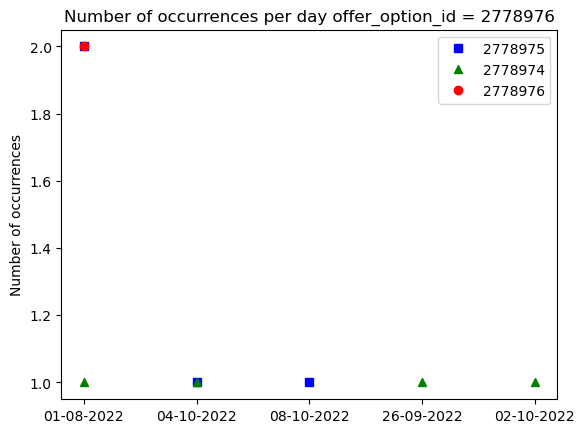

In [64]:
plt.plot(u.keys(),u.values(), 'bs', label = '2778975')
plt.plot(y.keys(),y.values(), 'g^', label = '2778974')
plt.plot(z.keys(),z.values(), 'ro', label = '2778976')
plt.title('Number of occurrences per day offer_option_id = 2778976')
plt.ylabel('Number of occurrences')
plt.legend()
plt.show()

Trying to understand the biggest interval in days between two different offers of a given offer_option id.

In [22]:
c = pd.to_datetime(df2.iloc[9,0])
c-b

Timedelta('4 days 00:00:00')

In [44]:
d1 = np.abs(a-b)
d2 = np.abs(c-b)
max1 = max(d1,d2)
type(max1)

pandas._libs.tslibs.timedeltas.Timedelta

In [47]:
type(max1.days)

int

In [48]:
#tentando calcular um delta
a = pd.to_datetime(df2.iloc[0,0])
b = pd.to_datetime(df2.iloc[7,0])
c = pd.to_datetime(df2.iloc[9,0])
biggest_delta = max(np.abs(a-b),np.abs(c-b))
print(f"For offer_id = 2778975, the delta between two offers is {a-b} and {c-b}. The biggest interval between two offers is {biggest_delta. days} days.")

For offer_id = 2778975, the delta between two offers is -64 days +00:00:00 and 4 days 00:00:00. The biggest interval between two offers is 64 days


In [84]:
dates = []
for i in range(3):
    o = pd.to_datetime(list(e.keys())[i])
    dates.append(o)
deltas = np.diff(dates)
max_delta = max(deltas).days
print(max_delta)

64


In [114]:
def max_delta(df, offer_id):
    ######
    # Given a offer_option_id, that function that calculates the biggest interval in days 
    # between two different offers.
    #
    # df - pandas.Dataframe
    # offer_id - int 
    ######
    e = df.loc[df['offer_option_id'] == offer_id]['datebr'].value_counts().to_dict()
    dates = []
    for i in range(len(e)):
        o = pd.to_datetime(list(e.keys())[i])
        dates.append(o)
    deltas = np.diff(dates)
    if len(deltas)!= 0:
        max_delta = max(deltas).days
        print(f"The biggest interval between two offers with 'offer_option_id' = {offer_id} is {max_delta} days.")
    else:
        print(f"The biggest interval between two offers with 'offer_option_id' = {offer_id} is 0 days.")

In [115]:
max_delta(df2, 2778975)

The biggest interval between two offers with 'offer_option_id' = 2778975 is 64 days.


In [116]:
max_delta(df2, 2778974)

The biggest interval between two offers with 'offer_option_id' = 2778974 is 56 days.


In [117]:
max_delta(df2, 2778976)

The biggest interval between two offers with 'offer_option_id' = 2778976 is 0 days.


In [71]:
deltas[0]

array([Timedelta('64 days 00:00:00'), Timedelta('4 days 00:00:00')],
      dtype=object)

In [83]:
dlst = np.diff(dates)
max(dlst).days

64

In [78]:
dlst[1]

Timedelta('4 days 00:00:00')

In [61]:
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
list(e.keys())

['2022-08-01', '2022-10-04', '2022-10-08']

In [31]:
df2

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales,Week day
0,2022-08-01,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,976,2443,3665,0,3665,1,Monday
1,2022-08-01,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,976,2443,3665,0,3665,4,Monday
2,2022-08-01,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,1027,2463,3695,0,3695,2,Monday
3,2022-08-01,LGPKG-1139792,2778976,Aéreo de Belo Horizonte,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5498,880,2551,3827,0,3827,1,Monday
4,2022-08-01,LGPKG-1139792,2778976,Aéreo de Belo Horizonte,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5498,935,2573,3860,0,3860,2,Monday
5,2022-09-26,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",121.0,20.0,7299,0,0,7299,0,7299,1,Monday
6,2022-10-02,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",145.0,22.0,7299,0,0,7299,0,7299,1,Sunday
7,2022-10-04,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",149.0,26.0,7299,0,0,7299,0,7299,1,Tuesday
8,2022-10-04,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",149.0,26.0,7299,0,0,7299,0,7299,1,Tuesday
9,2022-10-08,LGPKG-1139792,2778975,Aéreo de São Paulo,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",100.0,9.0,7299,1314,0,8613,0,8613,1,Saturday


In [53]:
e = df2.loc[df2['offer_option_id'] == 2778975]['datebr'].value_counts().to_dict()
e

{'2022-08-01': 2, '2022-10-04': 1, '2022-10-08': 1}

In [90]:
len(e)

3

In [135]:
u = df2.loc[df2['offer_option_id'] == 2778975]['formatted_date'].value_counts()
u

01-08-2022    2
04-10-2022    1
08-10-2022    1
Name: formatted_date, dtype: int64

In [66]:
print(np.count_nonzero(df2[0:5]['offer_option_id'] == 2778975))

2


In [67]:
print(np.count_nonzero(df2[5:10]['offer_option_id'] == 2778975))

2


In [60]:
list(range(2))

[0, 1]

In [69]:
for i in [0,1]:
    ocorr_wind = np.count_nonzero(df2[5*i:5*(i+1)]['offer_option_id'] == 2778975)
    print(f"The package '2778975' occurred {ocorr_wind} times in {i}-th window.")

The package '2778975' occurred 2 times in 0-th window.
The package '2778975' occurred 2 times in 1-th window.


In [77]:
list(df2['offer_option_id'].value_counts())

[4, 4, 2]

In [80]:
df2['offer_option_id'].value_counts()

2778975    4
2778974    4
2778976    2
Name: offer_option_id, dtype: int64

In [81]:
#Conta o número de ocorrências para cada valor possível de offer_option_id
df2[0:5]['offer_option_id'].value_counts()

2778975    2
2778976    2
2778974    1
Name: offer_option_id, dtype: int64

In [86]:
#Conta o número de ocorrências para cada valor possível de offer_option_id
df2[5:10]['offer_option_id'].value_counts()

2778974    3
2778975    2
Name: offer_option_id, dtype: int64

In [93]:
a1 = df2[0:5]['offer_option_id'].value_counts()
b1 = a1.to_dict()
b1

{2778975: 2, 2778976: 2, 2778974: 1}

In [92]:
a2 = df2[5:10]['offer_option_id'].value_counts()
b2 = a2.to_dict()
b2

{2778974: 3, 2778975: 2}

In [33]:
df.groupby(['offer_option_id']).mean()

,Unnamed: 0,multidestino,year,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales
offer_option_id,,,,,,,,,,,,
2778974,15634.25,1.0,2023.0,374.50,91.50,6757.25,244.00,610.75,6390.5,0.0,6390.5,1.75
2778975,11103.00,1.0,2023.0,603.75,157.75,6215.50,829.25,1226.50,5818.0,0.0,5818.0,1.25
2778976,100.50,1.0,2023.0,1083.00,298.00,5498.00,907.50,2562.00,3843.5,0.0,3843.5,1.50


In [28]:
df.groupby(['offer_option_id']).sum()

C:\Users\user\AppData\Local\Temp\ipykernel_8980\3599331400.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['offer_option_id']).sum()


,Unnamed: 0,multidestino,year,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales
offer_option_id,,,,,,,,,,,,
2778974,62537,4,8092.0,1498.0,366.0,27029,976,2443,25562,0,25562,7
2778975,44412,4,8092.0,2415.0,631.0,24862,3317,4906,23272,0,23272,5
2778976,201,2,4046.0,2166.0,596.0,10996,1815,5124,7687,0,7687,3


In [26]:
df2.loc[df2['offer_option_id'] == 2778974]

,datebr,sku,offer_option_id,offer_option_title,offer_option_description,product_name,destination_type,multidestino,year,package_date_format,destination_city,destination_state,destination_country,AttributeList,clicks,checkout,fullprice,yield,discount,realprice,interest,totalprice,sales,Week day
1,2022-08-01,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",1083.0,298.0,5132,976,2443,3665,0,3665,4,Monday
5,2022-09-26,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",121.0,20.0,7299,0,0,7299,0,7299,1,Monday
6,2022-10-02,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",145.0,22.0,7299,0,0,7299,0,7299,1,Sunday
8,2022-10-04,LGPKG-1139792,2778974,Aéreo do Rio de Janeiro,Aéreo ida e volta | Quarto Duplo ou Triplo | 8 Diárias (4 diárias em Lisboa + 4 diárias em Porto),Pacote de Viagem - Lisboa + Porto - Segundo Semestre 2023,INT,True,2023.0,Data flexível,Lisboa + Porto,Lisboa,Portugal,"Hospedagem Econômica,Passagem Aérea Econômica",149.0,26.0,7299,0,0,7299,0,7299,1,Tuesday
